Operação pegue o pombo

a idéia é detectar pombos em uma região por meio de processamento de imagem para tentar espanta-los. 

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np


In [9]:
import cv2
import numpy as np

# Variáveis globais
img_bgr = cv2.imread("dados/pombos2.png")
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
window_name = "filtro HSV"

lista_hsv = []
def mostra_valor_hsv(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        pixel = img_hsv[y, x]
        lista_hsv.append(pixel)
        print(f"HSV em ({x},{y}) = {pixel}")

cv2.namedWindow(window_name)
cv2.setMouseCallback(window_name, mostra_valor_hsv)



while True:
    cv2.imshow("filtro HSV", img_bgr)
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        if lista_hsv:
            hsv_array = np.array(lista_hsv)
            tol_h = 10
            tol_s = 30
            tol_v = 30

            min_h = max(0, np.min(hsv_array[:, 0]) - tol_h)
            max_h = min(179, np.max(hsv_array[:, 0]) + tol_h)
            min_s = max(0, np.min(hsv_array[:, 1]) - tol_s)
            max_s = min(255, np.max(hsv_array[:, 1]) + tol_s)
            min_v = max(0, np.min(hsv_array[:, 2]) - tol_v)
            max_v = min(255, np.max(hsv_array[:, 2]) + tol_v)

            print(f"image_lower_hsv = np.array([{min_h}, {min_s}, {min_v}])")
            print(f"image_upper_hsv = np.array([{max_h}, {max_s}, {max_v}])")

        break

cv2.destroyAllWindows()


HSV em (382,457) = [21 73 66]
HSV em (451,476) = [24 70 55]
HSV em (543,477) = [ 15 105  39]
HSV em (510,492) = [10 37 41]
HSV em (684,567) = [173  22  47]
HSV em (684,578) = [123  49  52]
HSV em (672,586) = [135  37  41]
HSV em (699,620) = [173  18  58]
HSV em (691,620) = [160  17  90]
HSV em (758,591) = [20 36 42]
HSV em (1437,701) = [140  25 153]
HSV em (1476,689) = [173  49  68]
HSV em (1599,672) = [175  87  35]
image_lower_hsv = np.array([0, 0, 5])
image_upper_hsv = np.array([179, 135, 183])


226 contornos encontrados.


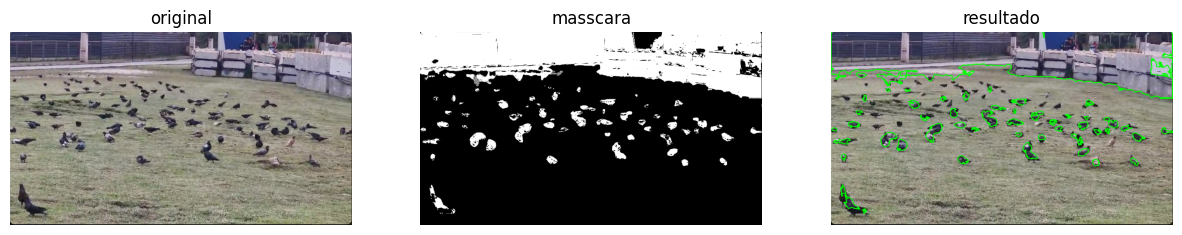

In [10]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np


img = cv2.imread('dados/pombos1.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


image_lower_hsv = np.array([56, 0, 45])
image_upper_hsv = np.array([179, 142, 212])

mask_hsv = cv2.inRange(img_hsv, image_lower_hsv, image_upper_hsv)


contornos, _ = cv2.findContours(mask_hsv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"{len(contornos)} contornos encontrados.")

sorted_contours = sorted(contornos, key=cv2.contourArea, reverse=True)
n_mostrar = 50


img_contornos = img_rgb.copy()
cv2.drawContours(img_contornos, sorted_contours[:n_mostrar], -1, (0, 255, 0), 3)


# Visualização da máscara
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(mask_hsv, cmap="gray")
plt.title("masscara")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(img_contornos)
plt.title(f"resultado")
plt.axis("off")
plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import interact, IntSlider

img = cv2.imread('dados/pombos2.png')

def show_images(images, titles=None):
    plt.close('all') 
    n = len(images)
    plt.figure(figsize=(15, 5))
    for i, img_item in enumerate(images):
        plt.subplot(1, n, i+1)
        if img_item.ndim == 2:
            plt.imshow(img_item, cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(img_item, cv2.COLOR_BGR2RGB))
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

def ajustar_mascara(h_min, h_max, s_min, s_max, v_min, v_max):
    clear_output(wait=True)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(img, img, mask=mask)
    show_images([img, mask, result], titles=['original', 'mascara', 'resultado'])

interact(
    ajustar_mascara,
    h_min = IntSlider(min=0, max=179, value=0, description='H min'),
    h_max = IntSlider(min=0, max=179, value=179, description='H max'),
    s_min = IntSlider(min=0, max=255, value=0, description='S min'),
    s_max = IntSlider(min=0, max=255, value=255, description='S max'),
    v_min = IntSlider(min=0, max=255, value=0, description='V min'),
    v_max = IntSlider(min=0, max=255, value=255, description='V max')
)

# image_lower_hsv = np.array([56, 0, 45])
# image_upper_hsv = np.array([179, 142, 212])


interactive(children=(IntSlider(value=0, description='H min', max=179), IntSlider(value=179, description='H ma…

<function __main__.ajustar_mascara(h_min, h_max, s_min, s_max, v_min, v_max)>

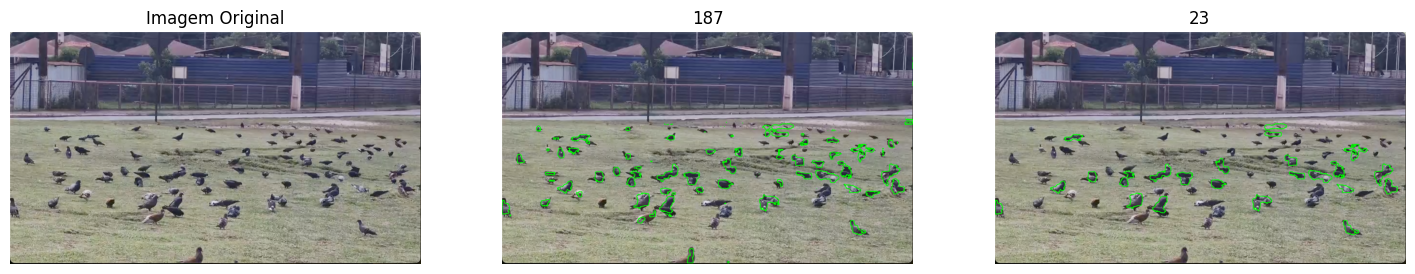

In [6]:

import cv2
import numpy as np
import matplotlib.pyplot as plt


AREA_MIN_POMBO = 1000 
    

img_bgr = cv2.imread("dados/pombos3.png")
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)


lower_pombo = np.array([56, 0, 45])
upper_pombo = np.array([179, 142, 212])


mask_pombo_roi = cv2.inRange(img_hsv, lower_pombo, upper_pombo)

# Filtra contornos dos pombos
contours_pombo, _ = cv2.findContours(mask_pombo_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# vou remover os últimos 3 contornos, que são grandes demais e representam o fundo
contours_pombo = sorted(contours_pombo, key=cv2.contourArea, reverse=False)[:-3]
# Filtra contornos com base na área mínima
contours_filtrados = [cnt for cnt in contours_pombo if cv2.contourArea(cnt) > AREA_MIN_POMBO]


# Desenha os contornos originais
img_result = img_bgr.copy()
cv2.drawContours(img_result, contours_pombo, -1, (0, 255, 0), 2)

img_result1= img_bgr.copy()
cv2.drawContours(img_result1, contours_filtrados, -1, (0, 255, 0), 2)


plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title("Imagem Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
plt.title(f"{len(contours_pombo)}")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_result1, cv2.COLOR_BGR2RGB))
plt.title(f"{len(contours_filtrados)}")
plt.axis("off")

plt.show()



In [ ]:
import cv2
import numpy as np


AREA_MIN_POMBO = 100

lower_pombo = np.array([56, 0, 45])
upper_pombo = np.array([179, 142, 212])


cap = cv2.VideoCapture('dados/pombos.mp4')

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img_bgr = frame
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    mask_pombo_roi = cv2.inRange(img_hsv, lower_pombo, upper_pombo)

    # Filtra contornos dos pombos
    contours_pombo, _ = cv2.findContours(mask_pombo_roi, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # vou remover os últimos 3 contornos, que são grandes demais e representam o fundo
    contours_pombo = sorted(contours_pombo, key=cv2.contourArea, reverse=False)[:-3]
    # Filtra contornos com base na área mínima
    contours_filtrados = [cnt for cnt in contours_pombo if cv2.contourArea(cnt) > AREA_MIN_POMBO]

    # Desenha os contornos originais
    img_result = img_bgr.copy()
    cv2.drawContours(img_result, contours_pombo, -1, (0, 255, 0), 2)
    img_result1= img_bgr.copy()
    cv2.drawContours(img_result1, contours_filtrados, -1, (0, 255, 0), 2)

    texto = f"detectados antes: {len(contours_pombo)}, depois: {len(contours_filtrados)}"
    cv2.putText(img_result, texto, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2.putText(img_result1, texto, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    cv2.imshow("antes", img_result)
    cv2.imshow("depois", img_result1)
    # Tecla 'q' para sair
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


: 